Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
import zipfile
#!unzip -u "/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/CNN_assignment.zip" -d "/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    #shuffle=True,
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
temp = list(data_dir_train.glob(class_names[0]+'/*.jpg'))[1]
type(data_dir_train)

val = data_dir_train.glob(class_names[0]+'/*.jpg')

print(temp)
type(str(temp))

/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/actinic keratosis/ISIC_0025803.jpg


str

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

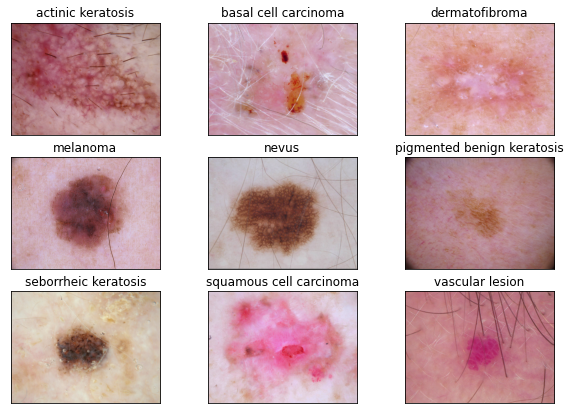

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure(figsize=(10,7))
i =0
for class_name in class_names:
    ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
    temp = list(data_dir_train.glob(class_name+'/*.jpg'))[0]
    val = str(temp)
    image = img.imread(val)
    ax.set_title(class_name)
    plt.imshow(image)
    i = i + 1
plt.show()

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Dense(num_classes, activation = "softmax"))




### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# https://keras.io/api/losses/
### Todo, choose an appropirate optimiser and loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()


model.compile(optimizer=optimizer,
               loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 128)      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 3s 40ms/step - loss: 2.3304 - accuracy: 0.2762 - val_loss: 2.3291 - val_accuracy: 0.2174
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.5724 - accuracy: 0.4492 - val_loss: 2.5989 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4383 - accuracy: 0.4983 - val_loss: 2.3375 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3475 - accuracy: 0.5268 - val_loss: 2.1536 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.2795 - accuracy: 0.5491 - val_loss: 2.5031 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1842 - accuracy: 0.5625 - val_loss: 3.2761 - val_accuracy: 0.2174
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1428 - accuracy: 0.5926 - val_loss: 3.3230 - val_accuracy: 0.1739
Epoch 8/20
56/56 [======

### Visualizing training results

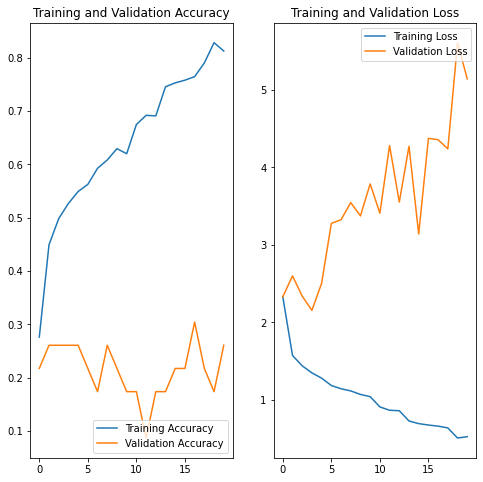

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model 1 Findings

*  The model is overfitting, we could clearly see the accuarcy of the training is 85% and the validation is around 25 %
 
* We can see the loss function is decreasing on the training , showing the model is able to learn. But on the contrary we can see a clear overfitting on the validation loss function as it is increasing.

* We need to improve the model with augumentation, drop outs and batch normalization

In [ ]:
# https://www.tensorflow.org/tutorials/images/data_augmentation
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

augumented = keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
])



In [ ]:
print((train_ds.take(1)))
#print(list(train_ds.as_numpy_iterator()))

for images, labels in train_ds.take(1):
    for i in range(9):
        print(class_names[labels[i]])
        #print(labels[i].numpy())

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
vascular lesion
dermatofibroma
basal cell carcinoma
actinic keratosis
nevus
nevus
squamous cell carcinoma
basal cell carcinoma
pigmented benign keratosis


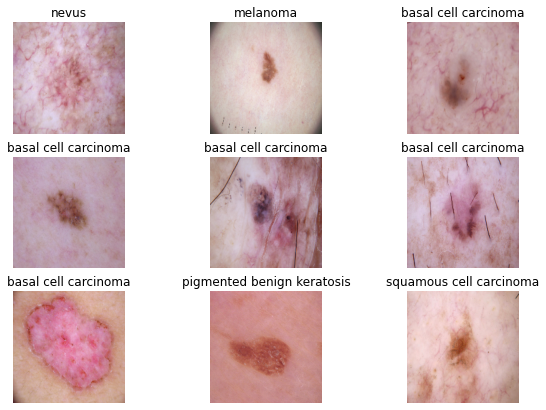

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 7))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augumented(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization


num_classes = 9
model_aug = Sequential([augumented, 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_aug.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.15))
model_aug.add(MaxPool2D(pool_size=(2,2)))

model_aug.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.15))
model_aug.add(MaxPool2D(pool_size=(2,2)))


model_aug.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.15))
model_aug.add(MaxPool2D(pool_size=(2,2)))


model_aug.add(Flatten())
model_aug.add(Dense(128))
model_aug.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [ ]:
## Your code goes here
model_aug.compile(optimizer=optimizer,
               loss=loss_fn,
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=40
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
56/56 [==============================] - 4s 66ms/step - loss: 1.2746 - accuracy: 0.5614 - val_loss: 5.3045 - val_accuracy: 0.2609
Epoch 2/40
56/56 [==============================] - 4s 64ms/step - loss: 1.2409 - accuracy: 0.5658 - val_loss: 4.7827 - val_accuracy: 0.1739
Epoch 3/40
56/56 [==============================] - 4s 65ms/step - loss: 1.2304 - accuracy: 0.5608 - val_loss: 4.2216 - val_accuracy: 0.1739
Epoch 4/40
56/56 [==============================] - 4s 65ms/step - loss: 1.2129 - accuracy: 0.5653 - val_loss: 4.5325 - val_accuracy: 0.1739
Epoch 5/40
56/56 [==============================] - 4s 65ms/step - loss: 1.2066 - accuracy: 0.5787 - val_loss: 4.7532 - val_accuracy: 0.2174
Epoch 6/40
56/56 [==============================] - 4s 64ms/step - loss: 1.2036 - accuracy: 0.5781 - val_loss: 5.5245 - val_accuracy: 0.2609
Epoch 7/40
56/56 [==============================] - 4s 64ms/step - loss: 1.2014 - accuracy: 0.5826 - val_loss: 4.2042 - val_accuracy: 0.2609
Epoch 8/40
56

### Visualizing the results

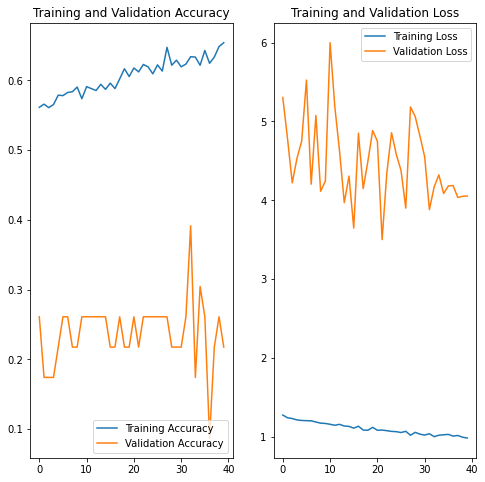

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



#### Model 2 Findings


*  The model is still overfitting , we could clearly see the accuarcy of the training  is 65% and the validation  is around 25 %. 

* The current model is better than the previous model ( Model 1 ) as we could see an ratio improvement of testing against validation ( 85% to 25% on model 1, compared against 65% to 25% on model 2)
 
* We can see the loss function is decreasing on the training , showing the model is able to learn. But on the validation we could see the variance is lot lesser. 

* We need to improve the model with auguementor to support class imbalancing

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

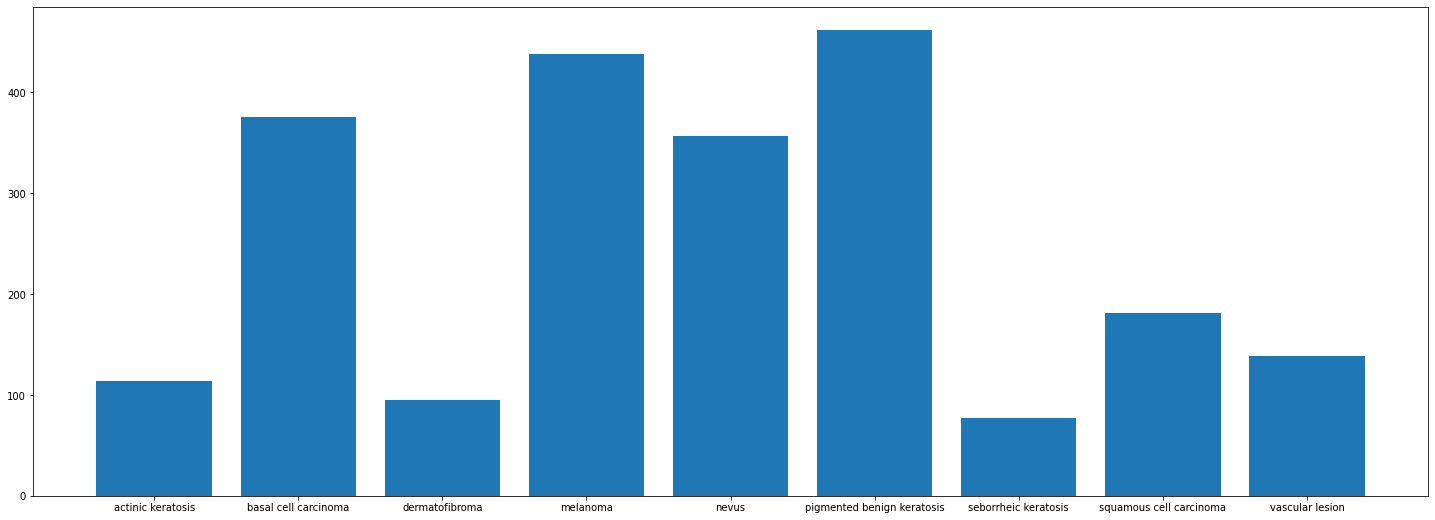

In [ ]:
## Your code goes here.

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,9))
plt.bar(class_names,count)


#### - Which class has the least number of samples? --  Seborrheic keratosis has the lowest distribution
#### - Which classes dominate the data in terms proportionate number of samples? -- Pigmented Benign keratosis has the highest distribution


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55FC47DF50>: 100%|██████████| 500/500 [00:21<00:00, 23.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55FC3460D0>: 100%|██████████| 500/500 [00:21<00:00, 23.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55FC346B90>: 100%|██████████| 500/500 [00:22<00:00, 22.05 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F55FC3FDD10>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F55FC346750>: 100%|██████████| 500/500 [01:26<00:00,  5.80 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55FC3FD5D0>: 100%|██████████| 500/500 [00:18<00:00, 27.33 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F55FC440B90>: 100%|██████████| 500/500 [00:40<00:00, 12.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F55FC41B090>: 100%|██████████| 500/500 [00:18<00:00, 27.48 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55FC4A3210>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)


In [ ]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

<BarContainer object of 9 artists>

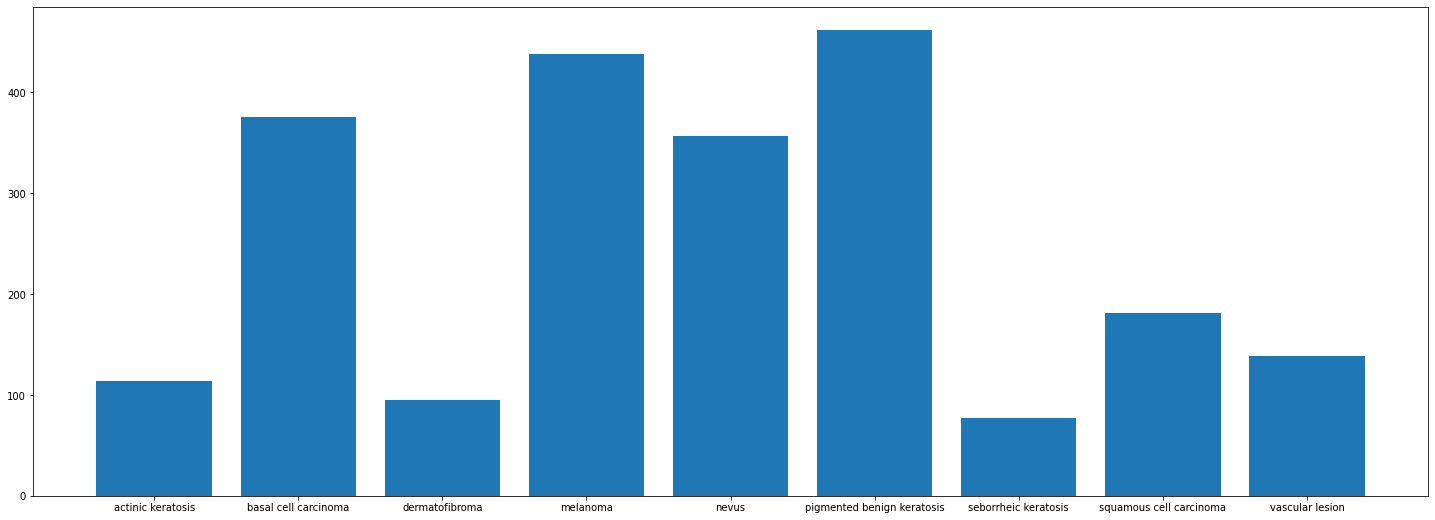

In [ ]:
count=[]
for i in class_names:
    #count.append(len(list(data_dir_train.glob(i+'/output/*.jpg'))))
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,9))
plt.bar(class_names,count)

<BarContainer object of 9 artists>

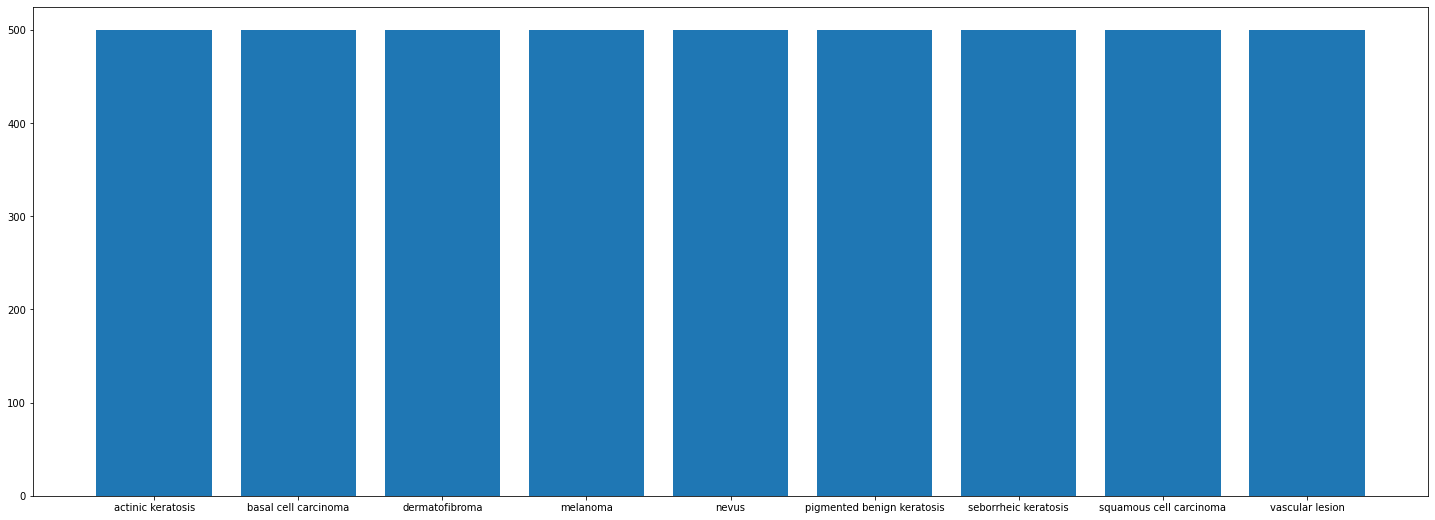

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/output/*.jpg'))))
    #count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,9))
plt.bar(class_names,count)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Colab_Notebooks/CNN_MELANOMA/Skin_cancer/Train/"
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_aug = train_ds_aug.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_aug = val_ds_aug.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(train_ds_aug)


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization


num_classes = 9
model_aug_cb = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_aug_cb.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_cb.add(BatchNormalization())
model_aug_cb.add(Dropout(0.15))
model_aug_cb.add(MaxPool2D(pool_size=(2,2)))

model_aug_cb.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_aug_cb.add(BatchNormalization())
model_aug_cb.add(Dropout(0.15))
model_aug_cb.add(MaxPool2D(pool_size=(2,2)))


model_aug_cb.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_aug_cb.add(BatchNormalization())
model_aug_cb.add(Dropout(0.15))
model_aug_cb.add(MaxPool2D(pool_size=(2,2)))


model_aug_cb.add(Flatten())
model_aug_cb.add(Dense(128))
model_aug_cb.add(Dense(num_classes, activation = "softmax"))



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model_aug_cb.compile(optimizer=optimizer,
               loss=loss_fn,
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
## Your code goes here, use 50 epochs.
epochs=50
history = model_aug_cb.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 40s 101ms/step - loss: 41.0439 - accuracy: 0.3451 - val_loss: 33.5189 - val_accuracy: 0.0906
Epoch 2/50
169/169 [==============================] - 11s 64ms/step - loss: 3.2135 - accuracy: 0.4657 - val_loss: 23.6489 - val_accuracy: 0.1247
Epoch 3/50
169/169 [==============================] - 11s 65ms/step - loss: 2.0101 - accuracy: 0.5171 - val_loss: 9.0000 - val_accuracy: 0.2517
Epoch 4/50
169/169 [==============================] - 11s 64ms/step - loss: 1.6118 - accuracy: 0.5562 - val_loss: 6.0504 - val_accuracy: 0.3756
Epoch 5/50
169/169 [==============================] - 11s 65ms/step - loss: 1.3298 - accuracy: 0.5881 - val_loss: 3.7868 - val_accuracy: 0.4150
Epoch 6/50
169/169 [==============================] - 11s 65ms/step - loss: 1.2381 - accuracy: 0.6137 - val_loss: 2.7890 - val_accuracy: 0.4937
Epoch 7/50
169/169 [==============================] - 11s 64ms/step - loss: 1.0030 - accuracy: 0.6510 - val_loss: 2.7838 - val_accuracy: 0.4915

#### **Todo:**  Visualize the model results

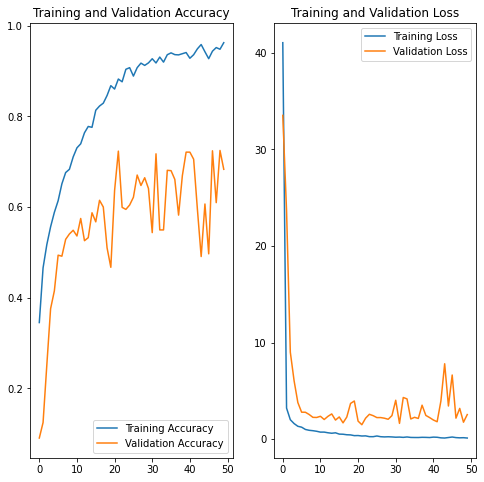

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

* The rebalance has improved the performance greatly
* The loss function graph for the testing and the validation is decreased in every iteration unlike the other models
* The accuracy of the training is upto 96% and the validation is upto 70%. Though there is a little bit of overfitting. The performance of the model is way above the other models.
